# INAUGURAL PROJECT 
**AUTHOR: LNP953**

Importing and setting magics:

In [176]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Importing Household Specialization Model
#import household as model
from inauguralproject import HouseholdSpecializationModelClass

#creating a new class
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1:

Illustrating the hour-ratio between home production for the female and the male when varying alpha and sigma.

In [177]:
#Creating a table
#Table 1 is inspired by the table made in PS1 excercise 2. 
def table():
    """this function defines a table that plots the values of HF/HM
    for the specified values of alpha and sigma"""
    
    #Empty text
    text = ''
    
    text += f'{"alpha / sigma":<7s}{"":1s}'

    #Top header
    for sigma in np.linspace(0.5,1.5,3):
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' #setting the column values equal to sigma
    text += '\n' + '-'*40 + '\n' #horisontal seperator 
    
    #Body
    for i,alpha in enumerate(np.linspace(0.25,0.75,3)):
        model.par.alpha=alpha 
        if i > 0: 
            text += '\n'
        text += f'{alpha:10.2f} |'  #setting the row values equal to alpha
        for sigma in np.linspace(0.5,1.5,3): 
            model.par.sigma=sigma
            opt = model.solve_discrete()
            HF_HM = opt.HF/opt.HM

            #plotting values
            text += f'{HF_HM:8.2f}'  
    
    #Resetting the values for alpha and sigma:
    model.par.alpha = 0.5
    model.par.sigma = 1.0
    
    #Printing
    print(f"Table 1: values of hF/hM when varying alpha and sigma:\n{text}")

table()

Table 1: values of hF/hM when varying alpha and sigma:
alpha / sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


**Interpretation:**

Alpha represents the productivity level of women in home production tasks, whereas (1-alpha) represents the male's producticity. 

Sigma represents the elasticity of substitution of men's and women's labor in home production. A higher sigma value indicates easier substitution between men and women in home production tasks.

# Question 2:

Plotting the logarithmic hour-ratio between home production for the female and the male, log(hF/hM), against the logarithmic wage-ratio in the market for the female and the male, log(wF/wM), for different values of wF.

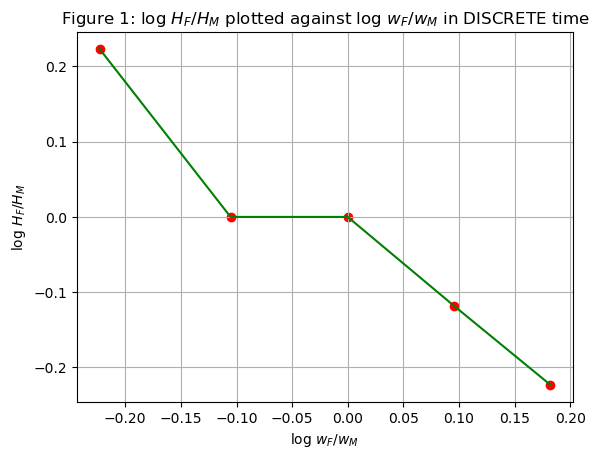

In [178]:
#Creating empty lists for the log hour-ratio and log wage-ratio in DISCRETE time
log_HF_HM_d = []
log_wF_wM_d = []

#Looping over wF values
for wF in [0.8, 0.9, 1.0, 1.1, 1.2]:
    #Setting wF value equal to current value in loop
    model.par.wF = wF

    #Solving the model in discrete time:
    #Storing solution in opt
    opt = model.solve_discrete() 

    #Calculating log(HF/HM) and log(wF/wM)
    log_HF_HM = np.log(opt.HF/opt.HM) 
    log_wF_wM = np.log(wF/model.par.wM)

    #Storing values in the empty lists
    log_HF_HM_d.append(log_HF_HM) 
    log_wF_wM_d.append(log_wF_wM)

#Plotting figure 1
plt.plot(log_wF_wM_d, log_HF_HM_d, linestyle='-', color='Green')
plt.scatter(log_wF_wM_d, log_HF_HM_d, color='red', marker='o')  #Adding markers at data points
plt.xlabel('log $w_F/w_M$')
plt.ylabel('log $H_F/H_M$')
plt.title('Figure 1: log $H_F/H_M$ plotted against log $w_F/w_M$ in DISCRETE time')
plt.grid(True)  #Adding grid lines
plt.show()

**Interpretation:**
The ratio of female hours worked (HF) to male hours worked (HM) will decrease as the ratio of female wages (WF) to male wages (WM) increases.

When alpha is exactly 0.5, it indicates equal efficiency between men and women in home production. This leads to an equal distribution of home work hours between the genders. It is worth noting, when alpha is 0.5, the value of sigma, representing substitution elasticity, does not affect how home production hours are allocated between men and women.

When alpha is greater than 0.5, it means women are more efficient in home production compared to men. In situations where men and women have equal wages (wF and wM = 1), women tend to spend more time on home production tasks than men.

In the other case, when alpha is less than 0.5, it implies that men are more efficient than women in home production. When both genders have equal wages (wF = wM = 1), men allocate more hours to home production than women. 

# Question 3:

Now plotting log(hF/hM) against log(wF/wM) in continous time for different values of wF.

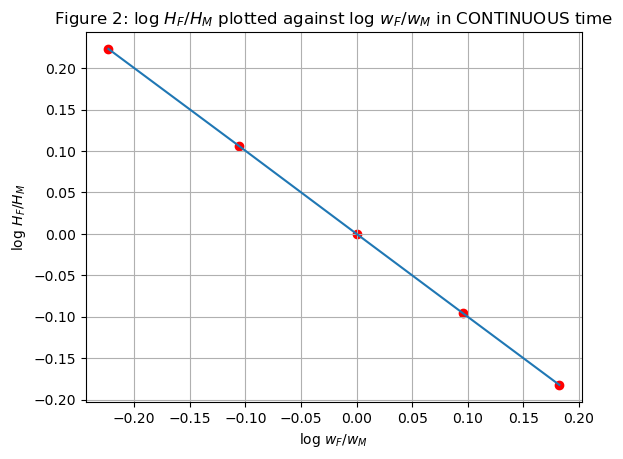

In [179]:
#Creating empty lists for the log hour-ratio and log wage-ratio in CONTINOUS time
log_HF_HM_c = np.empty(5)
log_wF_wM_c = np.empty(5)

#Solving the model in continous time:
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    
    #Saving the results in the empty lists from above
    log_HF_HM_c[i] = np.log(opt.HF/opt.HM)
    log_wF_wM_c[i] = np.log(model.par.wF/model.par.wM)
        
#Plotting figure 2
figure_two = plt.figure()
ax = figure_two.add_subplot(1, 1, 1)
ax.plot(log_wF_wM_c, log_HF_HM_c)
ax.scatter(log_wF_wM_c, log_HF_HM_c, color='red', marker='o')  #Adding markers at data points
ax.set_title('Figure 2: log $H_F/H_M$ plotted against log $w_F/w_M$ in CONTINUOUS time')
ax.set_xlabel('log $w_F/w_M$')
ax.set_ylabel('log $H_F/H_M$')
ax.grid(True)  #Adding grid lines
plt.show()

**Interpretation:** 
I see the same pattern as in figure 2: The ratio of female hours worked (HF) to male hours worked (HM) will decrease as the ratio of female wages (WF) to male wages (WM) increases.

The smoother curve in figure 2, compared to figure 1, is due to using a continuous model instead of a 48-step model. The continuous model allows for infinite combinations of hours in home production, resulting in a smoother curve and a more precise representation of the dynamics between the male and female home production.

# Question 4 :

Choosing alpha and sigma that minimizes the function.

In [180]:
from scipy import optimize

def obj_func(par):
    alpha, sigma = par

    #Setting alpha equal to the current value in the loop
    model.par.alpha = alpha 

    #Setting sigma equal to the current value in the loop
    model.par.sigma = sigma 

    #Using the solve function for wF values and regression function
    model.solve_wF_vec() 
    model.run_regression() 

    #Calling the beta parameters 
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    #Calculating the function
    return ((0.4-beta0)**2 + (-0.1-beta1)**2)

#Specifying bounds for alpha and sigma
bounds = [(0, 0.999), (0, 1.99)] 

#Using an initial guess
par0 = [0.5, 1]
result = optimize.minimize(obj_func, par0, bounds=bounds,method = "Nelder-Mead")
print(f"The values of alpha and sigma that minimizes the function is: alpha = {result.x[0]:.3f} and sigma = {result.x[1]:.3f}")

x = (0.988, 0.091)
print(obj_func(x))


The values of alpha and sigma that minimizes the function is: alpha = 0.983 and sigma = 0.099
7.147870295010995e-05


In [181]:

#Making a list of alphas and sigmas close to the optimal point found before

alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.00,0.1,20)

vec = []
#Creating a loop in a loop to calclate HF/HM 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        #Setting alpha equal to the current value in the loop
        model.par.alpha = alpha 

        #Setting alpha equal to the current value in the loop
        model.par.sigma = sigma 

        #Using the solve function for the female wage values
        model.solve_wF_vec() 

        #Using the regression function
        model.run_regression() 

        #Calculating the function
        value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if value > 0:
            vec.append(value)

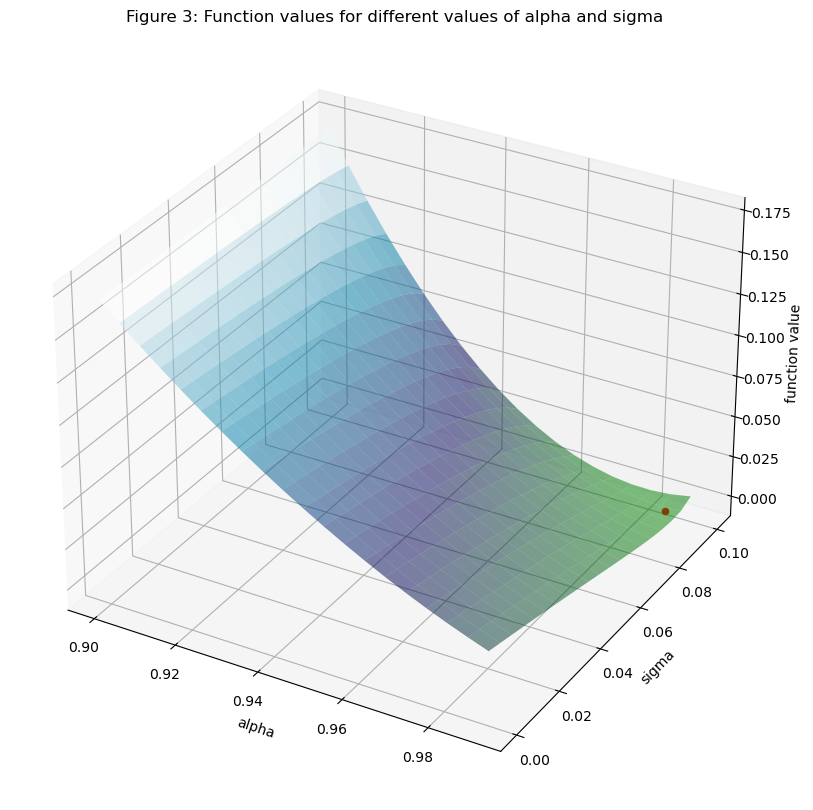

In [182]:
#Creating a 3D plot by using meshgrid 

#Changing the length of the alpha and sigma vector so it is equal to the length of "vec"
func_values = np.array(vec).reshape(len(alphas), len(sigmas)) 

#Making 2D grids of alpha and sigma values
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)

#Creating the 3D plot
figure_three = plt.figure(figsize=(12,10)) 

#Creating the three dimensions
ax = plt.axes(projection='3d')

#Plotting figure 3
ax.plot_surface(alpha_grid, sigma_grid, func_values, cmap='ocean', alpha = 0.50) 
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2], color='red') #Plotting optimal solution
ax.set_xlabel('alpha') 
ax.set_ylabel('sigma') 
ax.set_zlabel('function value') 
ax.set_title('Figure 3: Function values for different values of alpha and sigma') 
plt.show() 

# Question 5:

I modify the model by introducing a disutility of household labor for the man. This is because it can be assumed that men may experience emotional distress or a sense of emasculation when doing traditionally feminine household tasks, such as doing the laundry. To introduce this to the model, I include a new parameter (delta) that weights the disutility of time spent on household labor for the man. Mathematically, the utility function can be represented as follows:

$$
\max_{L_M, H_M, L_F, H_F} = \frac{Q^{1-\rho}}{1-\rho} - \nu (\frac{(L_M +\delta H_M)^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+{\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}}), \rho > 1, \nu > 0, \epsilon > 0, \delta > 0
$$

It is assumed, that the entire household considers the additional disutility experienced by the man when making decisions about how to allocate their time for work.

In [184]:
#Estimating the sigma and delta parameters in the economic model using the model.estimate()

#Defining the parameter values for sigma and delta
params = {'sigma': 0.5, 'delta': 5}

#Estimating sigma, delta, and the error using the model
estimated_sigma, estimated_delta, error_new = model.estimate(params=params)

#Printing the estimated values of sigma, delta and the error
print(f"Estimated sigma: {estimated_sigma}")
print(f"Estimated delta: {estimated_delta}")
print(f"Estimated error: {error_new}")


/Users/jasminsafai/Desktop/IntoProg/projects-2023-lnp953/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Estimated sigma: 0.3819821690120075
Estimated delta: 7.434187594692958
Estimated error: 0.7110151713000414


**Interpretation:**

The extended model estimates the values of sigma and delta by minimizing the error between the model's predicted outcome and the observed outcome. Sigma represents the elasticity of substitution of men's and women's labor in home production while delta represents the disutility of time spent on household labor for the man. The estimated sigma is 0.38, meaning the elasticity of substitution is 0.38. The estimated delta is 7.43, implying a negative impact on male utility from engaging in household work. The estimated error is 0.71, representing the difference between the model's estimation and the actual data. A lower error value indicates a better fit of the model to the observed data.

# Conclusion

The results suggest that the model I used, which assumes that men are unproductive and unhappy when doing household tasks like dishes, cleaning, and cooking, may not accurately reflect how households specialize in real life. The estimated values of sigma and delta show that if men are not significantly unproductive or don't feel strongly negative about these tasks, it challenges the assumptions of the model.

These results support the research by Siminski and Yetsenga (2022), who also found that the model I used doesn't explain how households specialize in their data. 